In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ABIA = pd.read_csv("ABIA.csv")
ABIA.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,1,2,120.0,1935,309.0,2130,9E,5746,...,3.0,18.0,0,NaN,0,339.0,0.0,0.0,0.0,0.0
1,2008,1,1,2,555.0,600,826.0,835,AA,1614,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,1,2,600.0,600,728.0,729,YV,2883,...,7.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,1,2,601.0,605,727.0,750,9E,5743,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,1,2,601.0,600,654.0,700,AA,1157,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
ABIA['ElapsedDelay'] = ABIA['ActualElapsedTime'] - ABIA['CRSElapsedTime']

In [4]:
def hour(a):
    if np.isnan(a)==True:
        return a
    else:
        str_a = str(int(a))
        if len(str_a) == 3:
            return int(str_a[0])
        elif len(str_a) == 4:
            return int(str_a[0:2])
        else: return 0
def a(a):
    return a
        
ABIA["DepTime_hour"] = ABIA['DepTime'].map(lambda x: hour(x))

In [5]:
# make a new df departing from Austin
ABIA_depart = ABIA[ABIA['Origin']=='AUS']
ABIA_depart = ABIA_depart[ABIA_depart['DepDelay']<600]
ABIA_depart['ArrDelay5'] = 0
ABIA_depart.loc[ABIA_depart['ArrDelay']>5,'ArrDelay5'] = 1

In [6]:
# segmentation
ABIA_depart["ontime"] = 0
ABIA_depart["5to40"] = 0
ABIA_depart["over40"] = 0
ABIA_depart.loc[ABIA_depart['ArrDelay']<5,"ontime"] = 1
ABIA_depart.loc[(ABIA_depart['ArrDelay']>5)&(ABIA_depart['ArrDelay']<40),"5to40"] = 1
ABIA_depart.loc[ABIA_depart['ArrDelay']>40,"over40"] = 1
ABIA_depart = ABIA_depart[ABIA_depart['DepDelay']<600]
ABIA_depart['DepDelay5'] = 0
ABIA_depart.loc[ABIA_depart['DepDelay']>5,'DepDelay5'] = 1

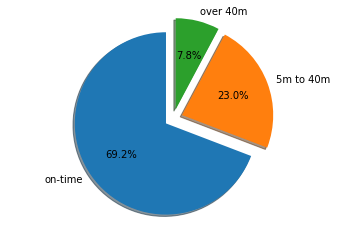

In [7]:
# Delay time segmentation
a = ABIA_depart['ontime'].mean()
b = ABIA_depart['5to40'].mean()
c = ABIA_depart['over40'].mean()
s = a+b+c
labels = ['on-time', '5m to 40m', 'over 40m']
sizes = [a/s,b/s,c/s]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 1.0, 'Percentage of Delay')

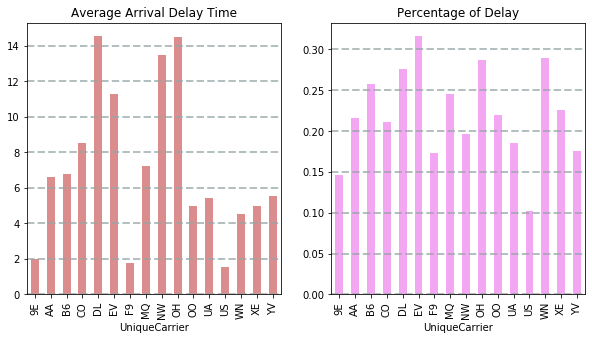

In [8]:
# Carriers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ABIA_depart.groupby(["UniqueCarrier"])['ArrDelay'].agg('mean').plot.bar(color='indianred', alpha=0.7, ax=ax[0])
ABIA_depart.groupby(["UniqueCarrier"])['DepDelay5'].agg('mean').plot.bar(color='violet', alpha=0.7, ax=ax[1])
ax[0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0].set_title("Average Arrival Delay Time")
ax[1].set_title("Percentage of Delay")

Text(0.5, 1.0, 'Average Arrival Delay Time')

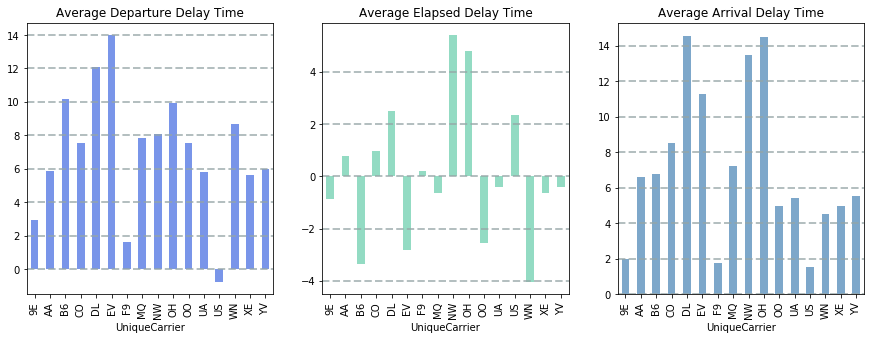

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ABIA_depart.groupby(["UniqueCarrier"])['DepDelay'].agg('mean').plot.bar(color='royalblue', alpha=0.7, ax=ax[0])
ABIA_depart.groupby(["UniqueCarrier"])['ElapsedDelay'].agg('mean').plot.bar(color='mediumaquamarine', alpha=0.7, ax=ax[1])
ABIA_depart.groupby(["UniqueCarrier"])['ArrDelay'].agg('mean').plot.bar(color='steelblue', alpha=0.7, ax=ax[2])
ax[0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[2].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0].set_title("Average Departure Delay Time")
ax[1].set_title("Average Elapsed Delay Time")
ax[2].set_title("Average Arrival Delay Time")

Text(0.5, 1.0, 'Percentage of Delay')

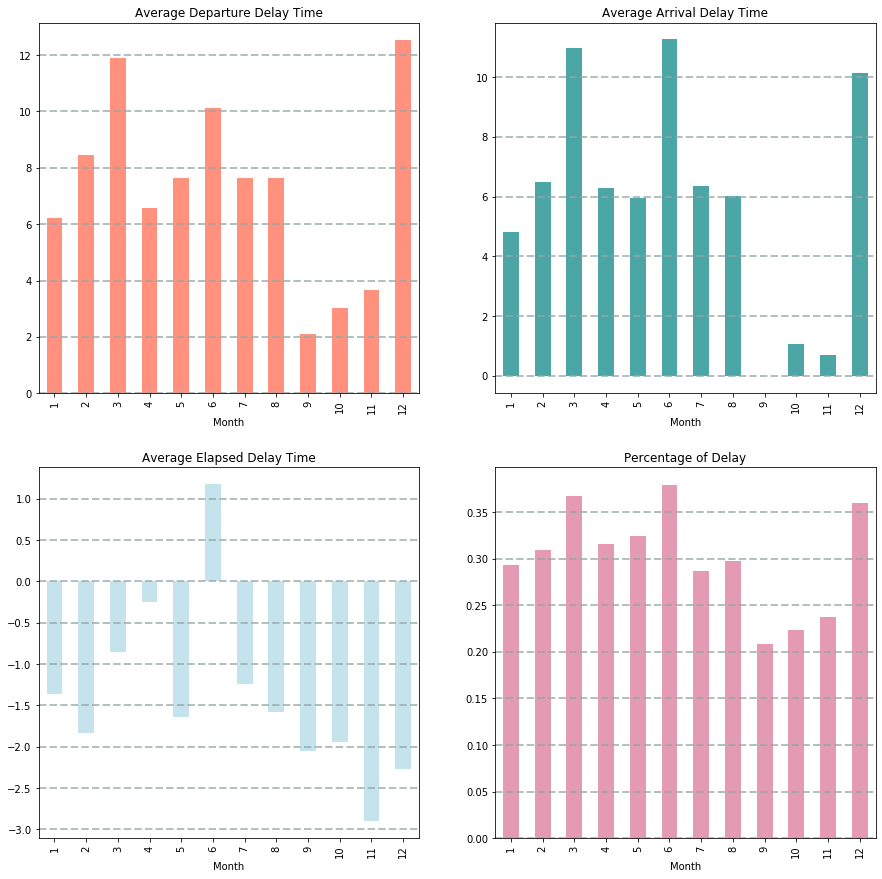

In [11]:
# delay time by month
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ABIA_depart.groupby(["Month"])['DepDelay'].agg('mean').plot.bar(color='tomato', alpha=0.7, ax=ax[0,0])
ABIA_depart.groupby(["Month"])['ArrDelay'].agg('mean').plot.bar(color='teal', alpha=0.7, ax=ax[0,1])
ABIA_depart.groupby(["Month"])['ElapsedDelay'].agg('mean').plot.bar(color='lightblue', alpha=0.7, ax=ax[1,0])
ABIA_depart.groupby(["Month"])['ArrDelay5'].agg('mean').plot.bar(color='palevioletred', alpha=0.7, ax=ax[1,1])
ax[0,0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0,1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1,0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1,1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0,0].set_title("Average Departure Delay Time")
ax[0,1].set_title("Average Arrival Delay Time")
ax[1,0].set_title("Average Elapsed Delay Time")
ax[1,1].set_title("Percentage of Delay")

Text(0.5, 1.0, 'Percentage of Delay')

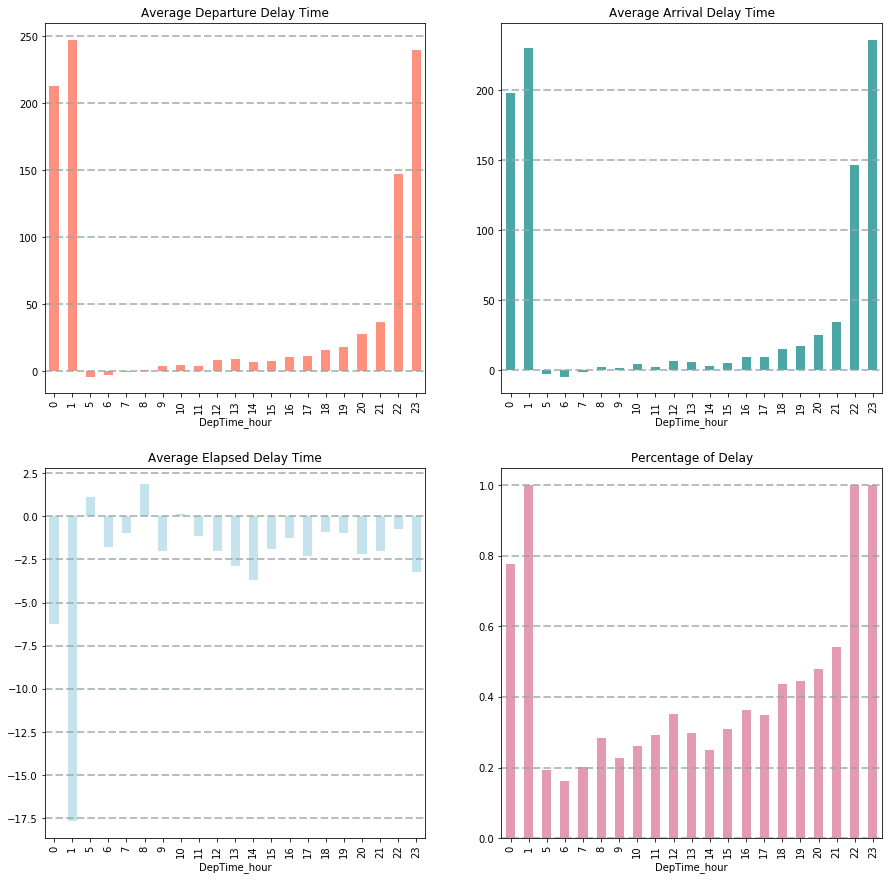

In [12]:
# delay time by departure time
temp = ABIA_depart.copy()
# temp = temp.dropna("DepTime_hour")
temp['DepTime_hour'] = temp['DepTime_hour'].astype("int")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
temp.groupby(["DepTime_hour"])['DepDelay'].agg('mean').plot.bar(color='tomato', alpha=0.7, ax=ax[0,0])
temp.groupby(["DepTime_hour"])['ArrDelay'].agg('mean').plot.bar(color='teal', alpha=0.7, ax=ax[0,1])
temp.groupby(["DepTime_hour"])['ElapsedDelay'].agg('mean').plot.bar(color='lightblue', alpha=0.7, ax=ax[1,0])
temp.groupby(["DepTime_hour"])['ArrDelay5'].agg('mean').plot.bar(color='palevioletred', alpha=0.7, ax=ax[1,1])
ax[0,0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0,1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1,0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1,1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0,0].set_title("Average Departure Delay Time")
ax[0,1].set_title("Average Arrival Delay Time")
ax[1,0].set_title("Average Elapsed Delay Time")
ax[1,1].set_title("Percentage of Delay")

Text(0.5, 1.0, 'Percentage of Delay')

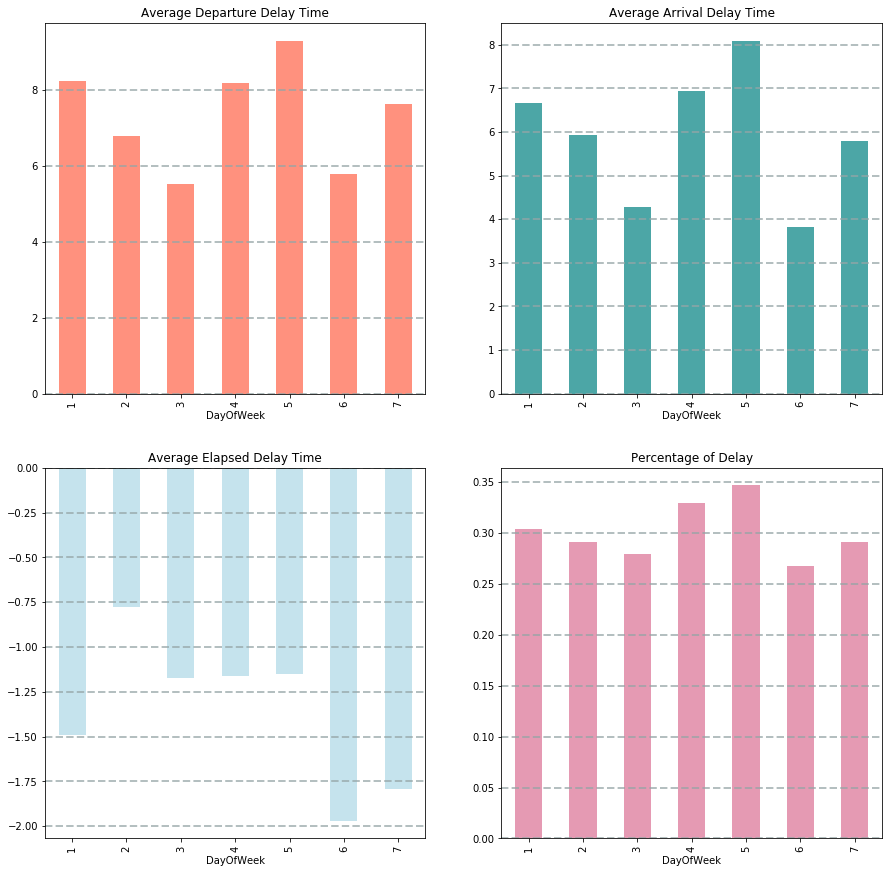

In [13]:
# delay time by day of week
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ABIA_depart['DayOfWeek'] = ABIA_depart['DayOfWeek'].astype("str")
ABIA_depart.groupby(["DayOfWeek"])['DepDelay'].agg('mean').plot.bar(color='tomato', alpha=0.7, ax=ax[0,0])
ABIA_depart.groupby(["DayOfWeek"])['ArrDelay'].agg('mean').plot.bar(color='teal', alpha=0.7, ax=ax[0,1])
ABIA_depart.groupby(["DayOfWeek"])['ElapsedDelay'].agg('mean').plot.bar(color='lightblue', alpha=0.7, ax=ax[1,0])
ABIA_depart.groupby(["DayOfWeek"])['ArrDelay5'].agg('mean').plot.bar(color='palevioletred', alpha=0.7, ax=ax[1,1])
ax[0,0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0,1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1,0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1,1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0,0].set_title("Average Departure Delay Time")
ax[0,1].set_title("Average Arrival Delay Time")
ax[1,0].set_title("Average Elapsed Delay Time")
ax[1,1].set_title("Percentage of Delay")